# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
import pylab
sns.set()

In [5]:
athletes = pd.read_csv("athletes.csv")

In [6]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [10]:
athletes.shape

(11538, 11)

In [7]:
athletes.head(5)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

O primeiro passo para resolver essa questão é coletar as amostras:

In [9]:
sample = get_sample(athletes,'height', n = 3000)

Aplicando o teste de Shapiro-Wilk:

In [30]:
q1= sct.shapiro(sample)
if q1[1] > 0.05:
    print("Hipótese de normalidade não pode ser descartada!")
else:
    print("Hipótese de normalidade está descartada!")
print("P-value: ",q1[1])

Hipótese de normalidade está descartada!
P-value:  5.681722541339695e-07


De acordo com o teste de normalidade de Shapiro-Wilk, a feature Height não segue a distribuição normal.

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

Text(0.5, 1.0, 'Distribuição de dados: Height')

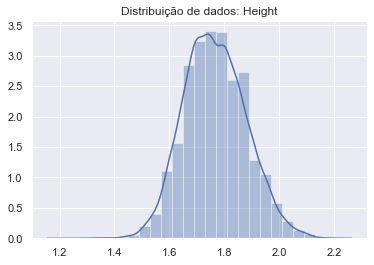

In [86]:
sns.distplot(athletes['height'].values,bins=25)
plt.title("Distribuição de dados: Height")

Não parecem resultados condizentes. Provavelmente por efeitos de aleatoriedade da amostra.

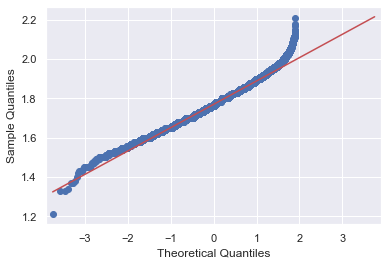

In [94]:
#plotagem do qqplot
sm.qqplot(athletes['height'],line="q");

Pelo Q-Q plot, a distribuição da feature Height não é normal.

O valor do P-value é muito pequeno e não é aplicável para análise. Com isso, sabe-se que não há valores utilizáveis para fazer **p-value hacking**.

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [95]:
q1= sct.jarque_bera(sample)
if q1[1] > 0.05:
    print("Hipótese de normalidade não pode ser descartada!")
else:
    print("Hipótese de normalidade está descartada!")
print("P-value: ",q1[1])

Hipótese de normalidade está descartada!
P-value:  0.001478366424594868


__Para refletir__:

* Esse resultado faz sentido?

O P-VALUE deu um valor bem diferente, mas com o mesmo resultado, o que já era esperado.

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

Text(0.5, 1.0, 'Amostra - Weight')

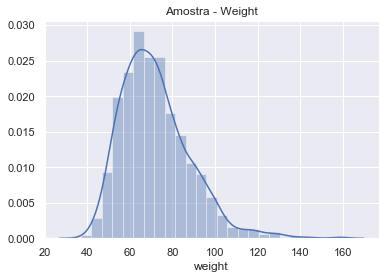

In [96]:
#Analise auxiliar - Questão 3
sample_2 = get_sample(athletes,'weight',n = 3000)
sns.distplot(sample_2,bins = 25,hist = True,hist_kws={"density": True})
plt.title('Amostra - Weight')

In [97]:
sample_2 = get_sample(athletes,'weight',n = 3000)
k, p = sct.normaltest(sample_2)
if p < 5/100:
    print("Hipótese de normalidade pode ser descartada!")
else:
    print("Hipótese de normalidade não pode ser descartada!")
print("P-VALUE: ",p)


Hipótese de normalidade pode ser descartada!
P-VALUE:  1.5898922918029537e-111


__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

Text(0.5, 1.0, 'Distribuição de dados: Weight')

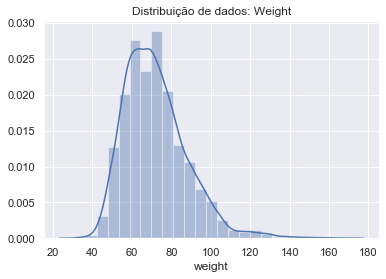

In [99]:
sns.distplot(athletes['weight'],bins=25)
plt.title("Distribuição de dados: Weight")

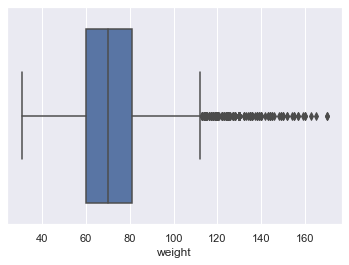

In [100]:
sns.boxplot(athletes['weight'])

Diante dos gráficos e com a confirmação do teste, nota-se que a distribuição não é normal.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

A ideia é aplicar a tranformação de box-cox nos dados para contornar a falta de normalidade dos dados. Para a transformação, foi usada a função np.log(), da biblioteca Numpy.

In [107]:
sample_2 = get_sample(athletes,'weight',n = 3000)
sample_2 = np.log(sample_2)
k, p = sct.normaltest(sample_2)

In [109]:
if p >0.05:
    print("Hipótese da normalidade não pode ser descartada!")
else:
    print("Hipótese de normalidade pode ser descartada!")
print("P-VALUE: ",p)

Hipótese de normalidade pode ser descartada!
P-VALUE:  1.0705572101256944e-10


__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

Percebe-se que a mudança não foi efetiva. É necessário testar outras transformações e otimizar os parâmetros aplicados em tais transformações para obter a normalidade para futuras análises de dados.

Text(0.5, 1.0, 'Distribuição de dados transformados: Weight')

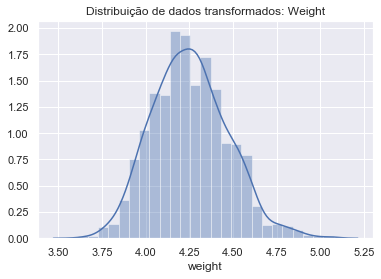

In [110]:
sns.distplot(sample_2,bins = 25)
plt.title("Distribuição de dados transformados: Weight")

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

Neste caso,o teste de hipótese tem a utilidade de comparação, para verificar se as duas amostras são de distribuições com a mesma média.

Vale lembrar que em testes de comparação, a hipótese nula é sempre que as duas amostras pertencem a mesma população.

In [111]:
#altura dos atletas brasileiros e norte-americanos
height_bra = athletes['height'].loc[athletes['nationality'] == 'BRA'].values
height_usa = athletes['height'].loc[athletes['nationality'] == 'USA'].values
test , p= sct.ttest_ind(height_bra,height_usa,nan_policy = 'omit')

In [113]:
if p>0.05:
    print("Possuem a mesma média!")
else:
    print("Possuem médias diferentes!")
print("P-VALUE: ",p)

Possuem médias diferentes!
P-VALUE:  0.0013229277795920673


## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [114]:
height_bra = athletes['height'].loc[athletes['nationality'] == 'BRA'].values
height_can = athletes['height'].loc[athletes['nationality'] == 'CAN'].values
test , p= sct.ttest_ind(height_bra,height_can,nan_policy = 'omit',equal_var = False)
if p>0.05:
    print("Possuem a mesma média!")
else:
    print("Possuem médias diferentes!")
print("P-VALUE: ",p)

Possuem a mesma média!
P-VALUE:  0.5230827295440921


## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [24]:
#altura dos atletas norte-americanos e canadenses
height_usa = athletes['height'].loc[athletes['nationality'] == 'USA'].values
height_can = athletes['height'].loc[athletes['nationality'] == 'CAN'].values
test , p= sct.ttest_ind(height_usa,height_can,nan_policy = 'omit',equal_var = False)

In [115]:
if p>0.05:
    print("Possuem a mesma média!")
else:
    print("Possuem médias diferentes!")
print("P-VALUE: ",p)

Possuem a mesma média!
P-VALUE:  0.5230827295440921


__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

Uma interpretação para o valor p é o menor nível de significância para não rejeitar a hipótese nula. Ou a probabilidade de que a estatística T caia na zona crítica, mesmo que a hipótese nula não possa ser rejeitada.